# Notebook für die Übung Medizininformatik

Dieses Notebook gibt erste Einblicke in die Arbeit mit Daten und Machine Learning. Es wird NICHT erwartet,dass Sie den Code vollständig verstehen, geschweige denn reproduzieren können. Stattdessen sollen Sie einen ersten Eindruck bekommen, wie Datenverarbeitung und Machine Learning in Python funktioniert.

### AUFGABE:
Führen Sie den Code Zeile für Zeile aus in dem Sie die Zeile anklicken und Umstelltaste + Enter oder den grünen Pfeil oben drücken. Eine bereits ausgeführte Zeile kann den Datensatz verändern und in darauffolgenden Zeilen zu Fehlern führen. Sollte dies bei Ihnen vorkommen, können Sie über „Restart Kernel“ neu starten. Allerdings muss aufgrund diese Abhängigkeiten dann von der ersten Zeile aus alles wieder ausgeführt werden. Sie finden in diesem Notebook Fragen und gelb markierte ToDos, die Sie bitte bearbeiten.
Falls nichts mehr geht, einfach das Notebook schließen und über den Link neu öffnen. Dann sind allerdings alle Änderungen verloren.

### HINWEIS:
Wir geben einige Informationen zum medizinischen Kontext dieser Aufgabe, allerdings ist dies nicht der Fokus dieser Veranstaltung (oder von uns Lehrenden). Außerdem ist heute nur sehr begrenzt Zeit, weshalb wir Sie bitten, sich hier nicht zu lange mit den medizinischen Aspekten dieses Use Cases aufzuhalten, sondern sich auf die technischen Details zu konzentrieren.


In [19]:
# DAS ist eine Code Zeile, die ausgeführt werden kann. Während es ausführt sehen Sie eine kleine Uhr, wenn es geklappt hat, sehen sie einen grünen Haken unten links von der Zeile. Falls nicht, gibt es einen Errorcode.

Das ist eine Text Zeile, die nur gelesen werden (sie können reinklicken und etwas verändern, das bringt Ihnen aber nichts).

## Schritt 0: Hintergrund & Zieldefinition

Dieser Datensatz stammt aus dem Paper:
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).

Herz-Kreislauf-Erkrankungen sind weltweit die Todesursache Nr. 1. Menschen, die an einer Herz-Kreislauf-Erkrankung leiden oder ein hohes kardiovaskuläres Risiko aufweisen, müssen frühzeitig erkannt und behandelt werden. Unser Datensatz enthält 274 Patient:innen (jeweils eine Reihe) mit fünf Features (Spalten) aus dem Faisalabad Institute of Cardiology am Allied Hospital in Faisalabad (Pakistan) von April bis Dezember 2015.

Features sind dabei das Machine Learning Äquivalent zu dem was man in der Statistik als Variablen bezeichnet.

Die letzte Spalte (DEATH_EVENT) zeigt an, ob die Person bis zum Follow-up zwischen 4 und 285 Tagen (Durchschnitt 130 Tage) nach Aufnahme der Werte verstorben ist. Des Weiteren haben wir die folgenden Informationen:

### Features:
- Sex: 0 ist Mann, 1 ist Frau
- Age: Alter in Jahren
- Ejection fraction: Auswurffraktion in %
- Platelets: Blutplättchen in Kiloplatelets/mL
- Serum creatinine: Kreatinwert in mg/dL

Ziel ist es, anhand der vorhandenen Features vorherzusagen, welche Patient:innen vor dem Follow-up versterben (DEATH_EVENT).

## Schritt 1: Daten (Ein-)Sammeln

Der folgende Code läd einen ausgewählten Teil dieses Datensatzes in unsere Entwicklungsumgebung.

In [2]:
# Diese Zeile importiert sogenannte Packages, die es uns erlauben, auf von anderen geschriebenen Code zuzugreifen.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Datensatz laden
# Wir benennen den Datensatz mit "df" (steht für DataFrame) und nutzen aus dem Pandas (pd) Package die "read_csv" Methode um die csv Datei einzulesen.
# Jetzt können wir mit "df" auf unseren Datensatz zugreifen
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# durch .head() werden die ersten fünf Patien:innen angezeigt.
df.head()

,age,ejection_fraction,platelets,serum_creatinine,sex,DEATH_EVENT
0,75.0,20,265000.00,1.9,1,1
1,55.0,38,263358.03,1.1,1,1
2,65.0,20,162000.00,1.3,1,1
3,50.0,20,210000.00,1.9,1,1
4,65.0,20,327000.00,2.7,0,1


## Schritt 2: Daten Exploration
Welche Visualiserung könnte spannend sein?

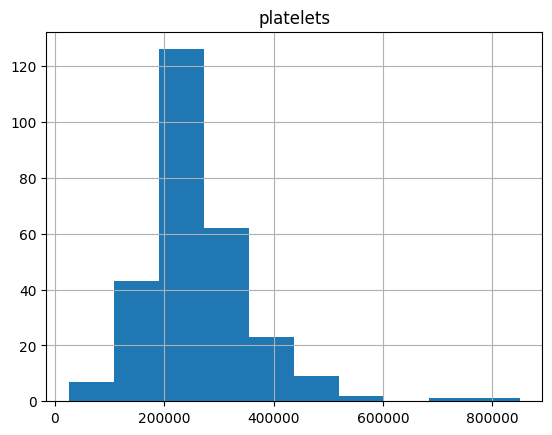

In [4]:
# Todo: Schauen Sie sich die Histogramme an und ersetzen Sie den Spaltennamen unten in dieser Zeile, da wo column = stejt durch andere numerische Variablen, für die ein Histogramm spannend sein könnte.
# Hinweis: Bei Python müssen Texte immer in "" angegeben werden. Ohne "" handelt es sich um den Namen einer Variablen oder Ähnliches. Schreiben Sie die Antwort also zum Beispiel als "age" und nicht age.

column = "platelets"
# Histogram Einzelne Variable
df.hist(column)
plt.show()

## Schritt 3: Data Cleaning

Der Maximalwert in der Spalte „age“ beträgt 1985, aber ein Patient im Alter von 1985 Jahren ist natürlich eher unrealistisch. Ersetzen Sie die Zahl hinter „korrekter_wert =“ mit dem besten Vorschlag, wie alt dieser Patient sein könnte.

In [5]:
# Wir lassen uns den maximalen Wert in der Spalte "age" anzeigen (Side note: .min(), .mean() oder .median() funktioniert genauso und .describe() gibt eine deskriptive Übersicht.
print(df['age'].max())

1985.0


In [7]:
#Todo: Ersetzen Sie in disere Zeile die 1985 für die beste Idee, welches Alter dieser Patient hat.
korrekter_wert = 1985

# Wenn Sie den ersetzt haben, läuft dieser Code durch und korrigiert das Problem.
# Diese Code schaut, wo in unserem DataFrame (df) in der Spalte "age" der Wert 1985 ist
# Für Felder mit dem Wert 1985 ersetzt er diesen Wert mit dem, was wir in korrekter_wert angeben.
# Für alle anderen Werte behält er was vorher in der Spalt "age" stand.

df.age = np.where(df.age==1985, korrekter_wert, df.age)

# Test: Hier sollte jetzt ein neuer maximaler Wert für Alter angezeigt werden.
print(df.age.max())

1985.0


In [8]:
# Wenn Sie ihren Wert sehen wollen, können Sie ihn so abrufen.
print(korrekter_wert)

1985


## Schritt 4: Feature Engineering
An dieser Stelle kann man sich überlegen, wie man die Daten noch verbessern kann, um das Verhältnis von wichtigen Informationen zu unwichtigen Informationen zu erhöhen. Dieser Datensatz ist schon recht kompakt und die Zeit heute begrenzt, weshalb wir diesen Schritt überspringen.

Beispiele, bei denen bereits Feature Engineering betrieben wurde, sind der binäre Indikator für Bluthochdruck, da die absoluten Werte bereits interpretiert wurden.

Ein weiteres, hier nicht zutreffendes Beispiel für Feature Engineering wäre, aus Gewicht und Größe den BMI zu berechnen, da bspw. 95 kg bei 1.60 Körpergröße ist im Sinne eines Risikofaktors anders zu bewerten als bei 1.95 m Körpergröße
.

## Schritt 5: Machine Learning

Jetzt gehen wir zum Machine-Learning-Teil über. Wir importieren ein logistisches Regressionsmodell, das uns eine Vorhersage für das Todesevent (1 oder 0) liefern kann.

In [9]:
# Wir importieren die benötigten Packages und Modelle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Wir laden das Modell und benennen es in "lr" um, um damit arbeiten zu können. Der solver und random_state sind technische, hier unwichtige Details.
lr = LogisticRegression(solver='liblinear', random_state=42)

# Unsere X-Features sind alle Werte, die wir zur Vorhersage nutzen wollen. Wir können auch weniger verwenden in dem wir einfach den Spaltennamen rauslöschen.

X = df[['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'sex']]

# Unser y-Wert ist das, was wir vorhersagen wollen
y = df['DEATH_EVENT']

# Wir teilen unsere Daten in 80 % Trainings- und 20 % Testdaten.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [31]:
# Beim "fit" berechnet das Modell, welche Funktion sich am besten an die Trainingsdaten anpasst.
lr.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Accuracy: 0.782608695652174
Sensitivität/ Recall 0.0
Spezifität 1.0


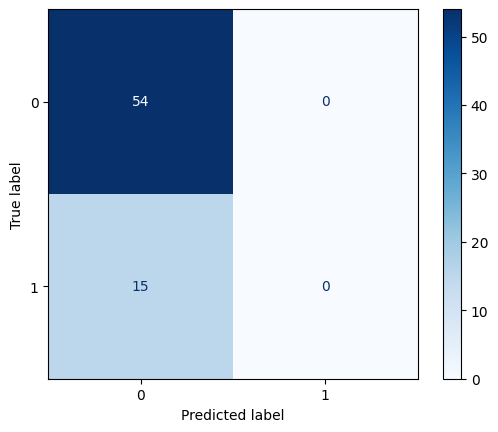

In [32]:
# Hier laden wir das Package, um uns die Confusion Matrix und alle Metriken anzeigen zu lassen
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Jetzt können wir schauen, wie gut das Modell auf den Testdaten performed. Dafür
#
# 1. Sagen wir DEATH_EVENT für die Testpatient:innen voraus
y_pred = lr.predict(X_test)

# 2. berechnen und plotten die Confusion Matrix und definieren daraus die TP, FP, FN, TN, wo jeweils T = True, F = False, P = Positive (Verstorben), N = Negative (nicht verstorben) ist.
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, cmap='Blues')

# 3. Berechnent mit diesen Werten alle gewollten Metriken.
# accuracy (True Positives + True Negatives) / (#Reihen)
print('Accuracy:', (tp + tn) / (tp + tn + fp + fn))
print('Sensitivität/ Recall', (tp) / (tp + fn))
print('Spezifität', (tn) / (tn + fp))

# TODO: Ist das ein gutes Vorhersagemodell?